<a href="https://colab.research.google.com/github/clarrabureg/testrepo/blob/main/Tarea_Final_Bat_Vecind_Lima_parte1_CLLG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------------------------------------------

## Tarea Final COURSERA -  Batalla de vecindarios de LIMA - PERU Parte 1 - CLLG
---------------------------------------------------------------

Indicaciones del Trabajo Final - Parte 1 (semana1)
Se deberá enviar lo siguiente: 
1.     Una descripción del problema y una discusión de los antecedentes. (15 puntos)
2.     Una descripción de los datos y cómo se utilizarán para resolver el problema. (15 puntos)
Indicaciones del Trabajo Final - Parte 2 (semana2)
Se deberá enviar lo siguiente: 
Para la segunda semana, las entregas finales del proyecto serán:
Un enlace a su Notebook en su repositorio de Github, que muestra su código. (15 puntos)
Un informe completo que consta de todos los siguientes componentes (15 puntos):
- Introducción en la que discute el problema comercial y 
quién estaría interesado en este proyecto.
- Datos donde describe los datos que se utilizarán para resolver el problema y la fuente de los datos.
- Sección de metodología que representa el componente principal del informe en el que analiza y describe cualquier análisis de datos exploratorio que realizó, cualquier prueba estadística inferencial que realizó, si corresponde, y qué aprendizaje automático se utilizó y por qué.
- Sección de resultados donde discute los resultados.
- Sección de debate en la que analiza las observaciones que notó y las recomendaciones que pueda hacer en función de los resultados.
- Sección de conclusiones donde concluye el informe.
3. Su elección de presentación o publicación de blog. (10 puntos)


---
INFORMACION DEL TRABAJO PREVIO REALIZADO
     

1.   Los archivos de datos fueron limpiados y preparados  mediante los programas:
        *   TRANS_GEO_Batalladevecindarios1.ipynb
        *   TRANS_UBIGEO_Batalladevecindarios1.ipynb
        *   COMBINA_Batalladevecindarios1.ipynb
2.   Se generó la tabla Newtabla.csv en donde se encuentra     ya List item la información lista para realizar los mapas y   agrupaciones
---

------------------------------------------------------
#### 2. PREPARACION DEL ENTORNO DE TRABAJO 
---

In [ ]:
## carga de librerias y preparación del entorno de trabajo 
import pandas as pd
import numpy as np
!conda install -c anaconda xlrd --yes
!pip install openpyxl
!conda install -c anaconda certifi
!pip install --upgrade certifi
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
!pip install folium
import folium
from folium.features import DivIcon
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")
import seaborn as sbs
import statistics as stats

/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


-----------------------------------------------------------

## 3. CARGA DEL ARCHIVO DE DATOS PREPARADO PARA ESTE TRABAJO
-----------------------------------------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# CONSIDERAR CARGAR EL ARCHIVO EN JUPYTER O COLAB Y CAMBIAR LA RUTA SI NO LO CORREN CON LOCAL COMO EN ESTE CASO
# SI EL ARCHIVO ES EN CSV USA ESTA LINEA
df_original = pd.read_csv("/content/drive/MyDrive/labatalla/newtabla.csv", sep = ",")
# SI EL ARCHIVO ES EN EXCEL USA ESTA LINEA 
#df_original = pd.read_excel("/content/drive/MyDrive/labatalla/GeoPeru-peru_distritos.xlsx")


Mounted at /content/drive


## 2. VISUALIZACION DE LOS DATOS 

In [ ]:
# MUESTRA LOS NOMBRES DE LAS COLUMNAS DEL ARCHIVO ORGININAL Y LOS GUARDA EN UNA VARIABLE
list_of_column_names = list(df_original.columns) 
print("List of column names : ",list_of_column_names) 

List of column names :  ['Unnamed: 0', 'id_ubigeo', 'departamento_x', 'provincia_x', 'distrito', 'region', 'altitud', 'latitud', 'longitud', 'porcentaje_AB', 'total_pers', 'cod_dpto', 'cod_prov', 'cod_dist', 'num_hog', 'pob_total']


In [ ]:
df_copia=df_original
df_copia = df_copia.drop(['cod_dpto', 'cod_prov','cod_dist','Unnamed: 0'], axis=1)
df_filtra=df_copia.loc[(df_copia['porcentaje_AB']) >=20]
df_filtra.sort_values(['porcentaje_AB','pob_total'], ascending = False, inplace = True)
df_copia=df_filtra
df_copia.head(50)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,id_ubigeo,departamento_x,provincia_x,distrito,region,altitud,latitud,longitud,porcentaje_AB,total_pers,num_hog,pob_total
11,1320,LIMA,LIMA,SANTIAGO DE SURCO,LIMA PROVINCIA,107.0,-12.1450,-77.0050,78.9,325101,100585,329152
21,1294,LIMA,LIMA,LA MOLINA,LIMA PROVINCIA,262.0,-12.0781,-76.9167,78.9,139654,40245,140679
30,1310,LIMA,LIMA,SAN BORJA,LIMA PROVINCIA,170.0,-12.1072,-76.9989,78.9,111015,34940,113247
24,1302,LIMA,LIMA,MIRAFLORES,LIMA PROVINCIA,125.0,-12.1217,-77.0292,78.9,97322,37626,99337
39,1311,LIMA,LIMA,SAN ISIDRO,LIMA PROVINCIA,195.0,-12.0978,-77.0272,78.9,59872,21073,60735
32,1316,LIMA,LIMA,SAN MIGUEL,LIMA PROVINCIA,84.0,-12.0922,-77.0794,70.2,152265,46210,155384
29,1301,LIMA,LIMA,PUEBLO LIBRE,LIMA PROVINCIA,114.0,-12.0781,-77.0625,70.2,82756,26407,83323
25,1293,LIMA,LIMA,JESUS MARIA,LIMA PROVINCIA,142.0,-12.0756,-77.0433,70.2,71530,23794,75359
27,1300,LIMA,LIMA,MAGDALENA DEL MAR,LIMA PROVINCIA,90.0,-12.0917,-77.0672,70.2,59059,19239,60290
26,1296,LIMA,LIMA,LINCE,LIMA PROVINCIA,150.0,-12.0844,-77.0303,70.2,54119,18193,54711


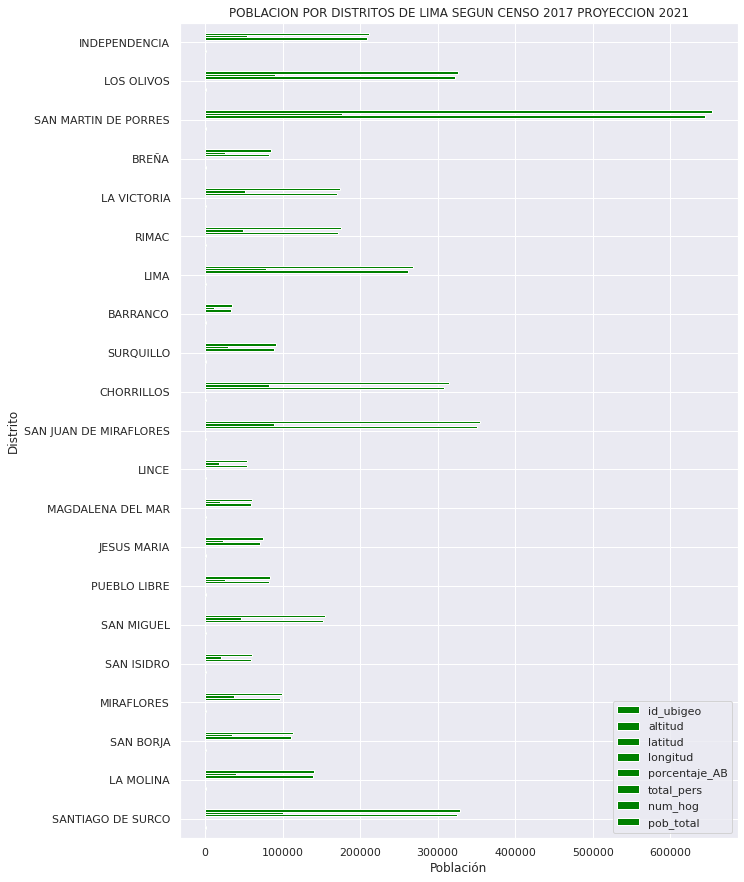

In [ ]:
## VISUALIZAMOS LA INFORMACION DE LOS DISTRITOS EN FUNCION DE SU % DE POBLACION DEL NSE AB
df_copia.set_index('distrito').plot(kind='barh', figsize=(10,15) , color = 'green')
plt.xlabel('Población')
plt.ylabel('Distrito')
plt.title('POBLACION POR DISTRITOS DE LIMA SEGUN CENSO 2017 PROYECCION 2021')
plt.show()


In [ ]:
## segunda parte
## cargar el geopy 
## verifiqe si esta geopy cargado en conda sino instale manualmente
# conda install -c conda-forge geopy ** y le da Y
from geopy.geocoders import Nominatim
# carga folium
!pip install folium
import folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Buscamos las coordenadas para realizar el mapa
address = 'Lima, Lima'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Las coordenadas de '+address,' son {}, {}.'.format(latitude,longitude))

Las coordenadas de Lima, Lima  son -12.0621065, -77.0365256.


In [ ]:
# hacemos el  mapa de la ciudad de Lima (Perú)
mapa_lima = folium.Map(location=[latitude, longitude], zoom_start = 10)
mapa_lima

In [ ]:
# ahora ponemos los marcadores de los distritos
for lat,lng, borough, neighborhood in zip(df_copia['latitud'],df_copia['longitud'],df_copia['provincia_x'],df_copia['distrito']):
    label= 'distrito {}, provincia {}'.format(neighborhood,borough)
    label= folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup= label,
        color= 'red',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(mapa_lima)

mapa_lima

In [ ]:
## graba nuevamente la tabla pero solo con los distritos qe superan el 20% de poblacion NSE AB
df_copia.to_csv("/content/drive/MyDrive/labatalla/newtabla.csv")

#### CONTINUA EN BATALLA DE VECINDARIOS DE LIMA - PARTE 2